<a href="https://colab.research.google.com/github/AmolPP97/Kaggle-Notebooks/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Credit Score classification/train.csv')

<ipython-input-2-9f5907a4ebc2>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Credit Score classification/train.csv')


In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob



1.   Age:
Correct the age values by using the mode after doing a regex cleanup for non numeric values.
2.   Annual Income:
Use mode after regex cleanup values.
3.   




In [5]:
df['Age'] = df.Age.apply(lambda a: re.findall(r'\d+',a)[0])
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0]).astype('int')

In [6]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda a: re.findall(r'\d+.\d+', a)[0]).astype('float')

In [7]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.mode()[0])

In [8]:
df['Num_of_Loan'] = df.Num_of_Loan.apply(lambda a: re.findall(r'\d+',a)[0])
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.mode()[0]).astype('int')

In [9]:
df['loan_type_count'] = df['Type_of_Loan'].apply(lambda x: 0 if pd.isna(x) else len(x.split(', ')))

In [10]:
pattern_1 = r'(\w+)_spent'
a = df['Payment_Behaviour'].apply(lambda x: re.findall(pattern_1, x))
df['pb_spent'] = a.apply(lambda x: x[0] if len(x) > 0 else np.nan).astype('str')

In [11]:
pattern_2 = r'_spent_(\w+)_value_payments'
a = df['Payment_Behaviour'].apply(lambda x: re.findall(pattern_2, x))
df['pb_value_pmnts'] = a.apply(lambda x: x[0] if len(x) > 0 else np.nan).astype('str')

In [12]:
dummies = pd.get_dummies(df['pb_spent'], prefix = 'pb_spent')[['pb_spent_High', 'pb_spent_nan']]
df = pd.concat([df,dummies], axis=1)

In [13]:
dummies = pd.get_dummies(df['pb_value_pmnts'], prefix = 'pb_value_pmnts')
df = pd.concat([df,dummies], axis=1)

In [14]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Score,loan_type_count,pb_spent,pb_value_pmnts,pb_spent_High,pb_spent_nan,pb_value_pmnts_Large,pb_value_pmnts_Medium,pb_value_pmnts_Small,pb_value_pmnts_nan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,4,High,Small,1,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,4,Low,Large,0,0,1,0,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,4,Low,Medium,0,0,0,1,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,4,Low,Small,0,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,4,High,Medium,1,0,0,1,0,0


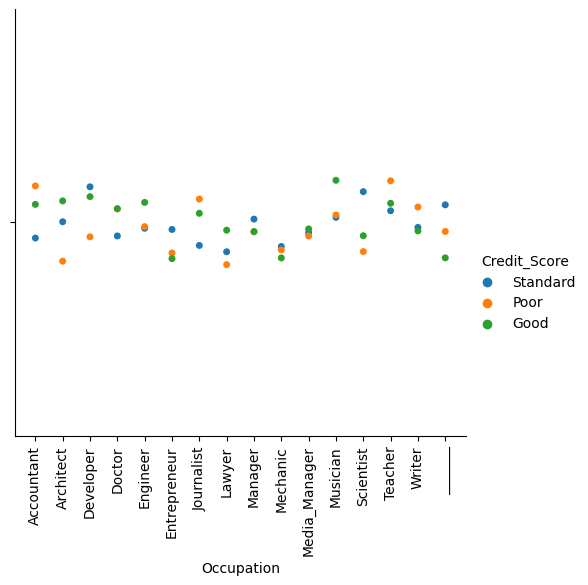

In [15]:
# Checking if there is any parity in Occupation-wise credit score performance
a = df.groupby('Occupation')['Credit_Score'].value_counts()*100/df.groupby('Occupation')['Credit_Score'].count()
catplot = sns.catplot(data=a,x='Occupation',hue='Credit_Score')
catplot.set_xticklabels(rotation=90)
plt.show()

No identifiable difference between occupation and credit score. Shall drop the column for simplicity sake.

In [16]:
dummies = pd.get_dummies(df['Payment_of_Min_Amount'], prefix = 'p_min_amt')
df = pd.concat([df,dummies], axis=1)

In [17]:
month_to_int = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september':9,
    'october':10,
    'november':11,
    'december':12
}
df['Month'] = df['Month'].str.lower().map(month_to_int)

In [18]:
a = df['Changed_Credit_Limit'].apply(lambda x: re.findall(r'\d+.\d+', x))
df['Changed_Credit_Limit'] = a.apply(lambda x: float(x[0]) if len(x) > 0 else 0)

In [19]:
df['Credit_Mix'] = df['Credit_Mix'].replace({'_':'Unknown'})
dummies = pd.get_dummies(df['Credit_Mix'], prefix = 'Credit_Mix')
df = pd.concat([df,dummies], axis=1)

In [20]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: float(re.findall(r'\d+.\d+', x)[0]))

In [21]:
def ch_age(row):
  ch_age_pattern = r'(\d+) Years and (\d+) Months'
  if pd.isna(row):
    return np.nan
  tup = re.findall(ch_age_pattern, row)[0]
  age = 12*int(tup[0])+int(tup[1])
  return age

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda row: ch_age(row)).fillna(method='ffill')

In [22]:
# Handling odd value
df['inv_unknown'] = (df['Amount_invested_monthly'] == '__10000__').astype(int)

# For other float values
a = df['Amount_invested_monthly'].apply(lambda x: re.findall(r'\d+.\d+', str(x)))
df['Amount_invested_monthly'] = a.apply(lambda x: float(x[0]) if len(x) > 0 else 0)

In [23]:
# Converting Balance to float
a = df['Monthly_Balance'].apply(lambda x: re.findall(r'\d+.\d+', str(x)))
df['Monthly_Balance'] = a.apply(lambda x: float(x[0]) if len(x) > 0 else np.nan)

# Marking Unknown balance
df['Monthly_Bal_Unknown'] = pd.isna(df['Monthly_Balance']).astype(int)

# Filling 0 for unknown values
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

In [24]:
a = df['Num_of_Delayed_Payment'].fillna(method = 'ffill').apply(lambda x: re.findall(r'\d+', str(x)))
b = a.apply(lambda x: int(x[0]) if len(x) > 0 else 0)

# Cutting off Max number of dalyed payments at 36
df['Num_of_Delayed_Payment'] = b.apply(lambda x: x if x <= 36 else 36)

# Marking off Higher freq delayed payments separately
df['High_freq_delayed_pymnt'] = (b > 36).astype(int)

In [25]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)

In [26]:
drop = ['ID','Customer_ID','Name', 'SSN', 'Occupation','Type_of_Loan','pb_spent','pb_value_pmnts', 'Payment_of_Min_Amount','Credit_Mix', 'Payment_Behaviour','Num_of_Delayed_Payment']

**Training Model**

In [27]:
X = df.drop(columns=drop)
y = X.pop('Credit_Score')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, RFECV, SelectKBest, SelectPercentile

In [30]:
import matplotlib.pyplot as plt
import plotly.express as px

Performing Feature Selection

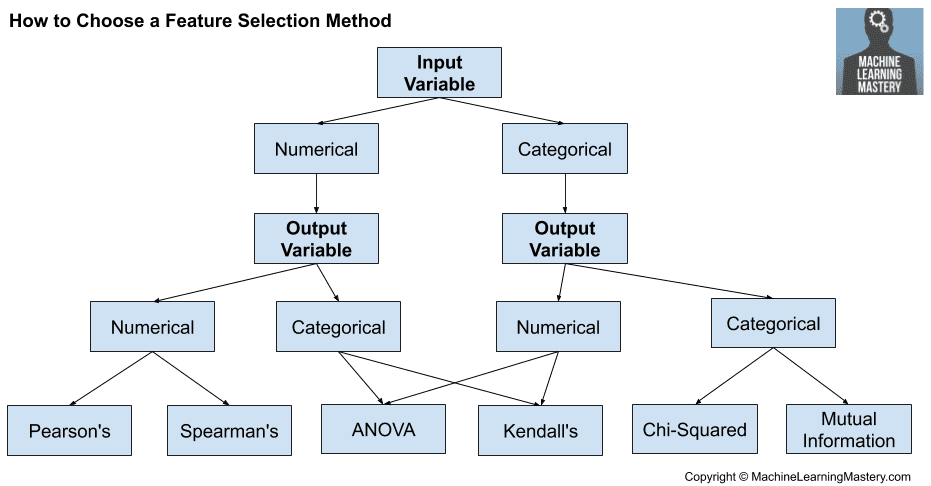

In [31]:
categorical_vars = ['pb_spent_High',
 'pb_spent_nan',
 'pb_value_pmnts_Large',
 'pb_value_pmnts_Medium',
 'pb_value_pmnts_Small',
 'pb_value_pmnts_nan',
 'p_min_amt_NM',
 'p_min_amt_No',
 'p_min_amt_Yes',
 'Credit_Mix_Bad',
 'Credit_Mix_Good',
 'Credit_Mix_Standard',
 'Credit_Mix_Unknown',
 'inv_unknown',
 'Monthly_Bal_Unknown',
 'High_freq_delayed_pymnt']

numerical_vars = ['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'loan_type_count']

In [32]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

In [33]:
selector_df = pd.DataFrame(index = X.columns)

In [34]:
# Defining Selector based on Mutual Information
selector = SelectPercentile(score_func=mutual_info_classif, percentile=50)
fit = selector.fit_transform(X_train, y_train)

In [35]:
# Selecting columns that give maximum information
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'loan_type_count',
 'p_min_amt_No',
 'p_min_amt_Yes',
 'Credit_Mix_Bad',
 'Credit_Mix_Good']

In [36]:
mi = mutual_info_classif(X_train, y_train)

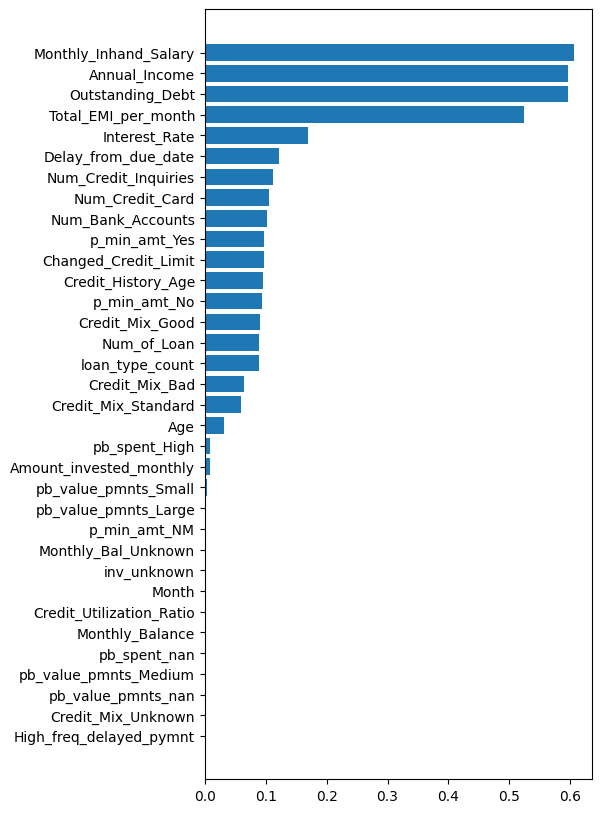

In [37]:
plt.figure(figsize = (5,10))
plt.barh(X.columns[mi.argsort()], mi[mi.argsort()])
plt.show()

In [38]:
# Saving information in the selector DataFrame
selector_df.loc[selected_columns, 'Mutual_inf'] = 1
selector_df.fillna(0, inplace=True)

Selecting based on f_score

In [39]:
# Defining Selector based on F-Score
selector = SelectPercentile(score_func=f_classif, percentile=50)
fit = selector.fit_transform(X_train, y_train)

In [40]:
# Selecting columns that give maximum information
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

['Age',
 'Monthly_Inhand_Salary',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'loan_type_count',
 'pb_spent_High',
 'pb_value_pmnts_Large',
 'pb_value_pmnts_Small',
 'p_min_amt_No',
 'p_min_amt_Yes',
 'Credit_Mix_Bad',
 'Credit_Mix_Good',
 'Credit_Mix_Standard']

In [42]:
# Saving information in the selector DataFrame
selector_df.loc[selected_columns, 'F_score'] = 1
selector_df.fillna(0, inplace=True)

In [43]:
len(selector_df[(selector_df['Mutual_inf'] == 1) | (selector_df['F_score'] == 1)].index)

23

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Selecting feature based on Wrapper selection method
selector = RFECV(estimator=DecisionTreeClassifier(class_weight='balanced'), min_features_to_select = 20, cv=5)
fit = selector.fit_transform(X_train, y_train)

In [46]:
# Selecting columns that give maximum information
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'loan_type_count',
 'p_min_amt_Yes',
 'Credit_Mix_Standard']

In [47]:
# Saving information in the selector DataFrame
selector_df.loc[selected_columns, 'RFE_DTree'] = 1
selector_df.fillna(0, inplace=True)

In [48]:
comb_select_col = selector_df[(selector_df['Mutual_inf'] + selector_df['F_score'] + selector_df['RFE_DTree']) >= 2].index

In [49]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

In [50]:
ymap = {
    'Good': 0,
    'Standard': 1,
    'Poor': 2
}
y_train_num = y_train.map(ymap)

In [51]:
xgb = XGBClassifier()
cv = StratifiedKFold(n_splits=5)
cv_results = cross_validate(xgb, X_train[comb_select_col], y_train_num, cv=cv)

In [52]:
cv_results

{'fit_time': array([34.54320693, 30.12242484, 29.97661686, 32.73550153, 29.96159267]),
 'score_time': array([0.08783674, 0.08745027, 0.09613323, 0.08735752, 0.09698033]),
 'test_score': array([0.754125 , 0.749625 , 0.747125 , 0.7584375, 0.752625 ])}

In [54]:
rf_clf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
cv_results = cross_validate(rf_clf, X_train[comb_select_col], y_train_num, cv=cv)

In [55]:
np.mean(cv_results['test_score'])

0.791325

In [56]:
rf_clf = RandomForestClassifier(class_weight='balanced')
cv = StratifiedKFold(n_splits=5)
cv_results = cross_validate(rf_clf, X_train[comb_select_col], y_train_num, cv=cv)

In [57]:
np.mean(cv_results['test_score'])

0.7891125000000001

Fitting Model

In [58]:
# Fitting RF model on combined selected columns
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf = rf_clf.fit(X_train[comb_select_col], y_train_num)

Predicting on Test data and measuring accuracy

In [59]:
y_pred_num = rf_clf.predict(X_test[comb_select_col])

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
accuracy_score(y_pred_num, y_test.map(ymap))

0.7956

In [62]:
def plot_conf_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix/np.sum(conf_matrix), fmt='.2%', annot=True, cmap='Blues')
    plt.show()
    return

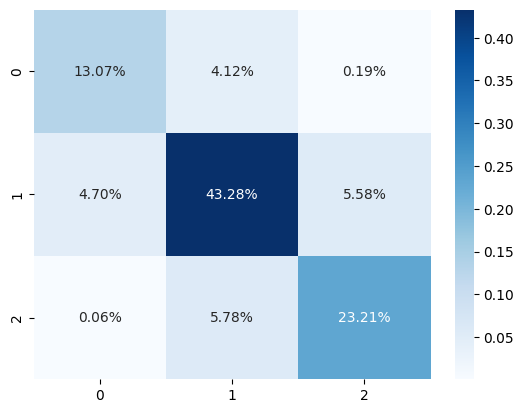

In [63]:
plot_conf_matrix(y_pred_num, y_test.map(ymap))

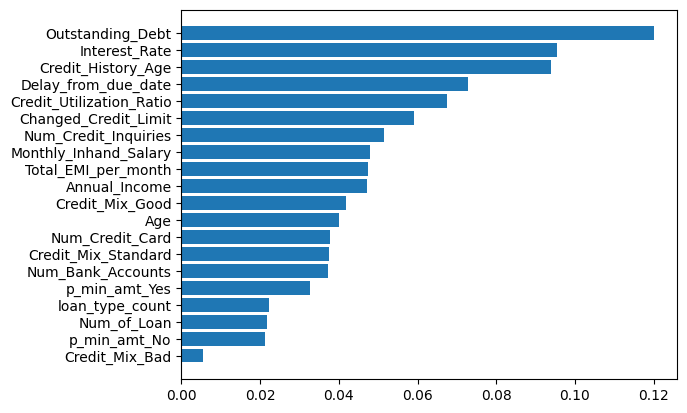

In [64]:
imp = rf_clf.feature_importances_

plt.barh(comb_select_col[imp.argsort()], imp[imp.argsort()])
plt.show()

Adding SHAP for explainability

In [ ]:
!pip install shap

In [66]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [68]:
# Fit the explainer
explainer = shap.Explainer(rf_clf.predict, X_train[comb_select_col][:1000])
# Calculating the SHAP values - It takes some time
shap_values = explainer(X_train[comb_select_col][:1000])

Permutation explainer: 1001it [19:08,  1.16s/it]


In [82]:
y_train_pred = rf_clf.predict(X_train[comb_select_col])

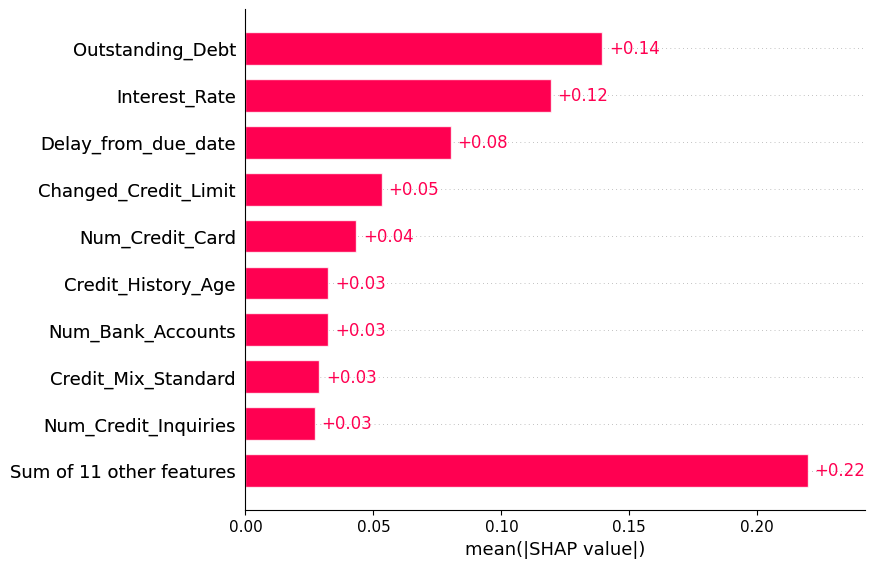

In [69]:
# Plotting average SHAP value for each variable
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


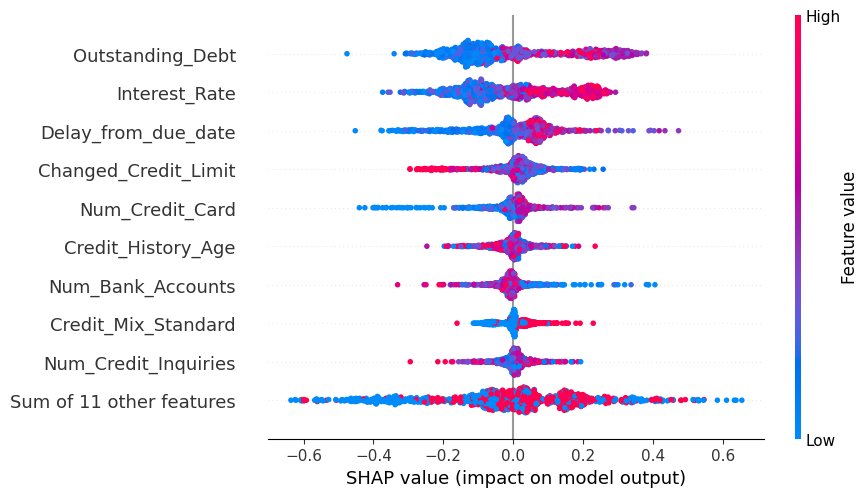

In [70]:
# Visualizing Summary of the model
shap.plots.beeswarm(shap_values)

Checking the reason for prediction using SHAP Waterfall plot

In [117]:
y_sample_pred = y_train_pred[:1000]
y_sample_actual = np.array(y_train_num)[:1000]

In [118]:
pd.Series(y_sample_pred).value_counts()

1    543
2    287
0    170
dtype: int64

In [120]:
np.unique(y_sample_actual)

array([0, 1, 2])

In [140]:
sample_dict = {}
for i in np.unique(y_sample_actual):
  sample_dict[i] = np.where(np.array(y_sample_pred) == i)[0][:5]

In [141]:
sample_dict

{0: array([ 1, 10, 14, 16, 17]),
 1: array([0, 2, 3, 7, 9]),
 2: array([ 4,  5,  6,  8, 20])}

In [97]:
# Checking the value of the first Prediction:
y_train_pred[1]

0

In [103]:
np.array(y_train_num)[1]

0

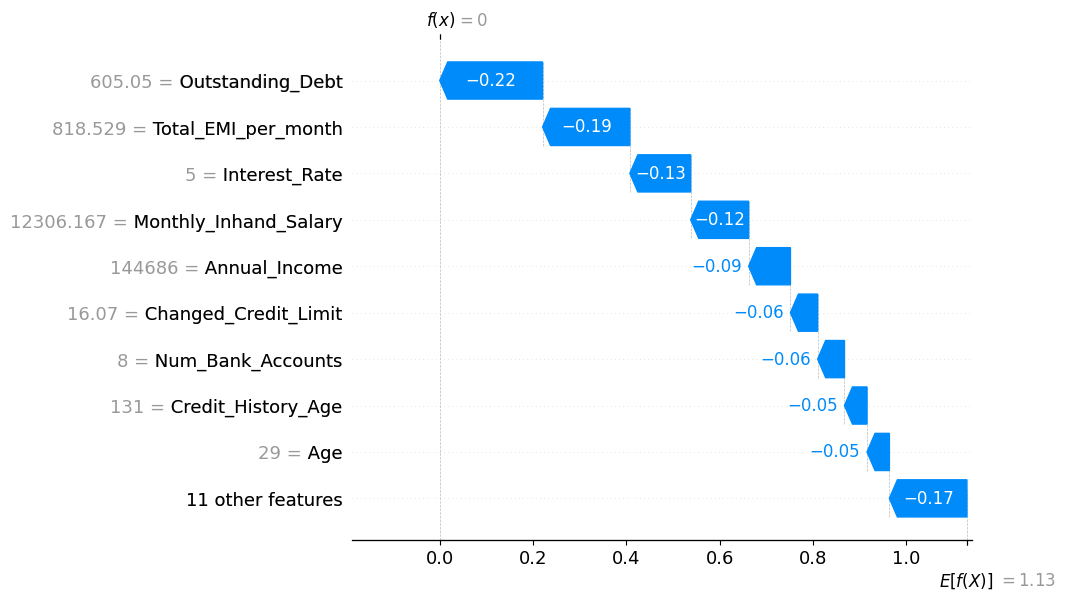

In [100]:
# Plotting Local Waterfall chart for this observation to check effect of each var
shap.plots.waterfall(shap_values[1])

In [98]:
y_train_pred[0]

1

In [104]:
np.array(y_train_num)[0]

1

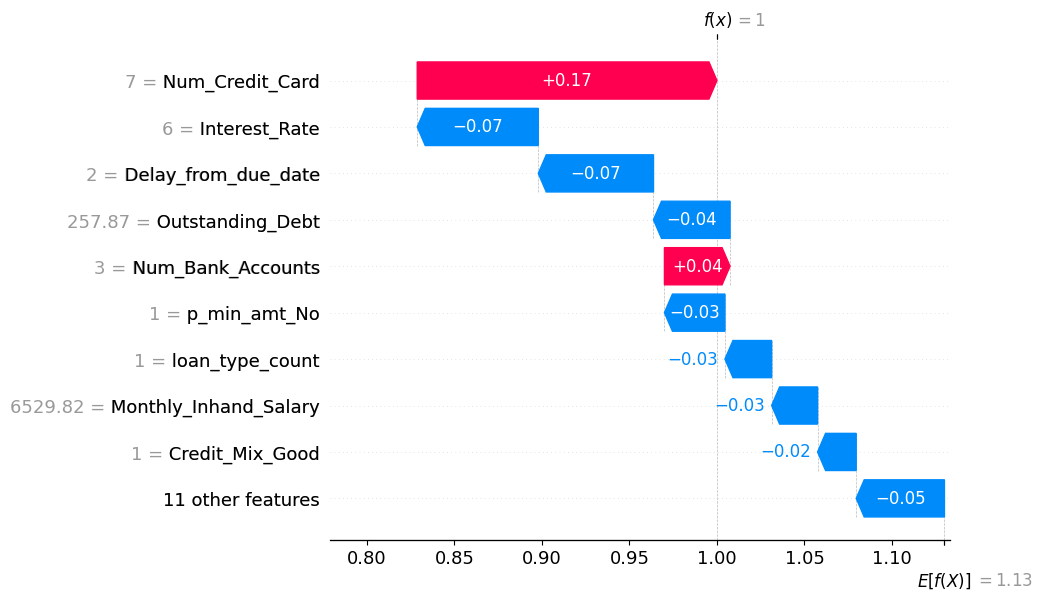

In [106]:
# Plotting Local Waterfall chart for this observation to check effect of each var
shap.plots.waterfall(shap_values[0])

In [142]:
y_train_pred[4]

2

In [143]:
np.array(y_train_num)[4]

2

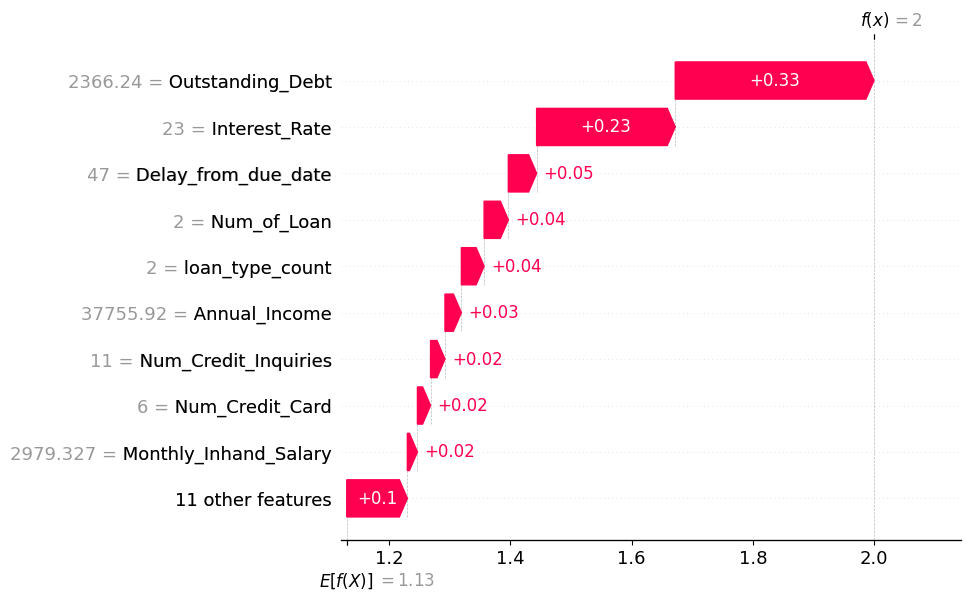

In [144]:
# Plotting Local Waterfall chart for this observation to check effect of each var
shap.plots.waterfall(shap_values[834])